In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Long Nguyen/Box/My folder/Project/Fraud Detection/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Explore the Data

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


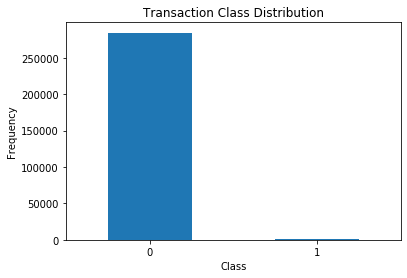

In [4]:
class_count = pd.value_counts(df['Class'],sort = True).sort_index()
class_count.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency");

In [5]:
print('Normal:', round(df['Class'].value_counts()[0],2), 
      'cases, which is', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fraud:', round(df['Class'].value_counts()[1],2), 
      'cases, which is',round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Normal: 284315 cases, which is 99.83 % of the dataset
Fraud: 492 cases, which is 0.17 % of the dataset


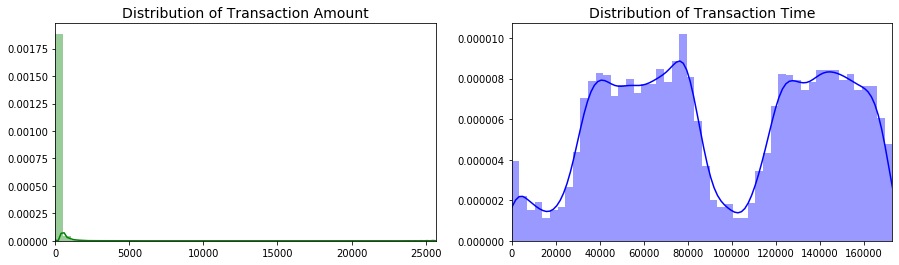

In [6]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]

fig, ax = plt.subplots(1,2,figsize=(15,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color = 'g')
ax[0].set_title('Distribution of Transaction Amount', fontsize = 14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color = 'b')
ax[1].set_title('Distribution of Transaction Time', fontsize = 14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Text(0.06, 0.5, 'Amount')

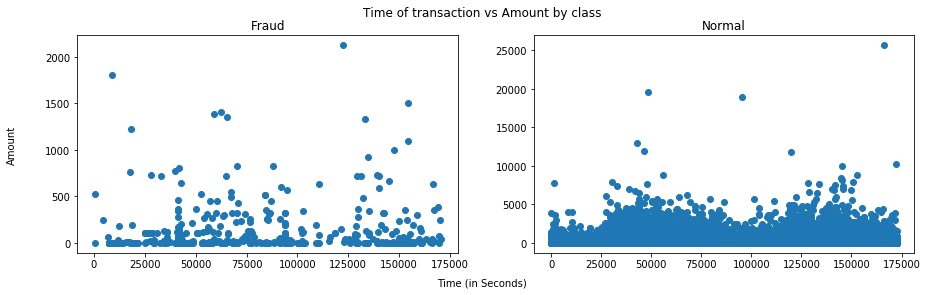

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')


f.text(0.5, 0.01, 'Time (in Seconds)', ha='center')
f.text(0.06, 0.5, 'Amount', va='center', rotation='vertical')

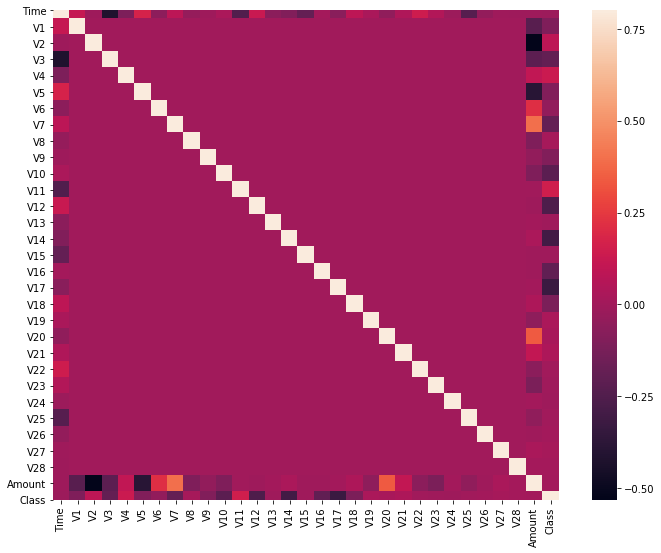

In [8]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)

# Prepare the Data

### Feature scaling 

In [9]:
# Time and Amount have not been scaled 
from sklearn.preprocessing import StandardScaler

df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


### Create a sub-sample using the UnderSampling method 

In [10]:
#slicing
X = df.iloc[:, df.columns !='Class'] #everything except class
y = df.iloc[:, df.columns == 'Class'] #only class

In [11]:
fraud_cases = len(df[df.Class == 1]) #number of fraud cases
fraud_indices = np.array(df[df.Class == 1].index) #indices of fraud cases

normal_indices = np.array(df[df.Class == 0].index) #indices of normal cases

random_normal_indices = np.random.choice(normal_indices, fraud_cases, replace = False) #randomly choose 492 normal cases
random_normal_indices = np.array(random_normal_indices)

sub_indices = np.concatenate([fraud_indices,random_normal_indices]) #append two indices
sub_df = df.iloc[sub_indices,:] #create a dataset for the sub-sample

X_sub = sub_df.iloc[:, sub_df.columns != 'Class']
y_sub = sub_df.iloc[:, sub_df.columns == 'Class']

print("Percentage of normal transactions in the sub-sample: ", len(sub_df[sub_df.Class == 0])/len(sub_df))
print("Percentage of fraud transactions in the sub-sample: ", len(sub_df[sub_df.Class == 1])/len(sub_df))
print("Total number of transactions in the sub-sample: ", len(sub_df))

Percentage of normal transactions in the sub-sample:  0.5
Percentage of fraud transactions in the sub-sample:  0.5
Total number of transactions in the sub-sample:  984


### Spitling the sub-sample for training

In [12]:
from sklearn.model_selection import train_test_split

# Sub-sample dataset
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size = 0.2, random_state = 22)

print("Number of transactions in train sub dataset: ", len(X_train))
print("Number of transactions in test sub dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train) + len(X_test))

Number of transactions in train sub dataset:  787
Number of transactions in test sub dataset:  197
Total number of transactions:  984


In [13]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

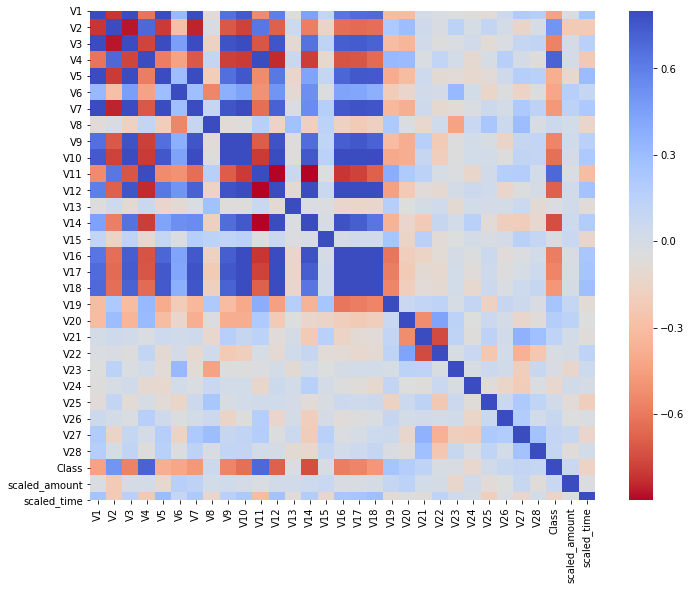

In [14]:
correlation_matrix_sub = sub_df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix_sub,cmap='coolwarm_r',vmax=0.8,square = True)

# Models Training

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

In [16]:
#Logistic Regression
model1 = LogisticRegression(solver='lbfgs')
model1.fit(X_train, y_train.ravel())
model1_score = cross_val_score(model1, X_train, y_train.ravel(), cv = 10)

#Support Vector Classifier
model2 = SVC(gamma='scale')
model2.fit(X_train, y_train.ravel())
model2_score = cross_val_score(model2, X_train, y_train.ravel(), cv = 10)

#KNN Classifier
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train.ravel())
model3_score = cross_val_score(model3, X_train, y_train.ravel(), cv = 10)

#Decision Tree Classifier
model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train.ravel())
model4_score = cross_val_score(model4, X_train, y_train.ravel(), cv = 10)

#Random Forest Classifier
model5 = RandomForestClassifier(n_estimators=100)
model5.fit(X_train, y_train.ravel())
model5_score = cross_val_score(model5, X_train, y_train.ravel(), cv = 10)

In [17]:
print("Logistic Regression has a training score of", round(model1_score.mean(), 2) * 100, "% accuracy score")
print("Random Forest Classifier has a training score of", round(model5_score.mean(), 2) * 100, "% accuracy score")
print("Support Vector Classifier has a training score of", round(model2_score.mean(), 2) * 100, "% accuracy score")
print("KNN Classifier has a training score of", round(model3_score.mean(), 2) * 100, "% accuracy score")
print("Decision Tree Classifier has a training score of", round(model4_score.mean(), 2) * 100, "% accuracy score")

Logistic Regression has a training score of 94.0 % accuracy score
Random Forest Classifier has a training score of 94.0 % accuracy score
Support Vector Classifier has a training score of 94.0 % accuracy score
KNN Classifier has a training score of 93.0 % accuracy score
Decision Tree Classifier has a training score of 90.0 % accuracy score


# Fine-tune the Models

In [18]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(solver='liblinear', max_iter = 1000), log_reg_params, cv = 10)
grid_log_reg.fit(X_train, y_train.ravel())

# Logistic regression best estimator
log_reg = grid_log_reg.best_estimator_

# KNN Classifier
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, cv = 10)
grid_knears.fit(X_train, y_train.ravel())

# KNN best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(gamma='scale'), svc_params, cv = 10)
grid_svc.fit(X_train, y_train.ravel())

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv = 10)
grid_tree.fit(X_train, y_train.ravel())

# Decision tree best estimator
tree_clf = grid_tree.best_estimator_
 
# Random Forest Classifier
randf_params = [{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
               {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]

grid_randf = GridSearchCV(RandomForestClassifier(n_estimators=100),randf_params,cv = 10)
grid_randf.fit(X_train, y_train.ravel())

# Decision tree best estimator
randf_clf = grid_randf.best_estimator_

### Confustion Matrix

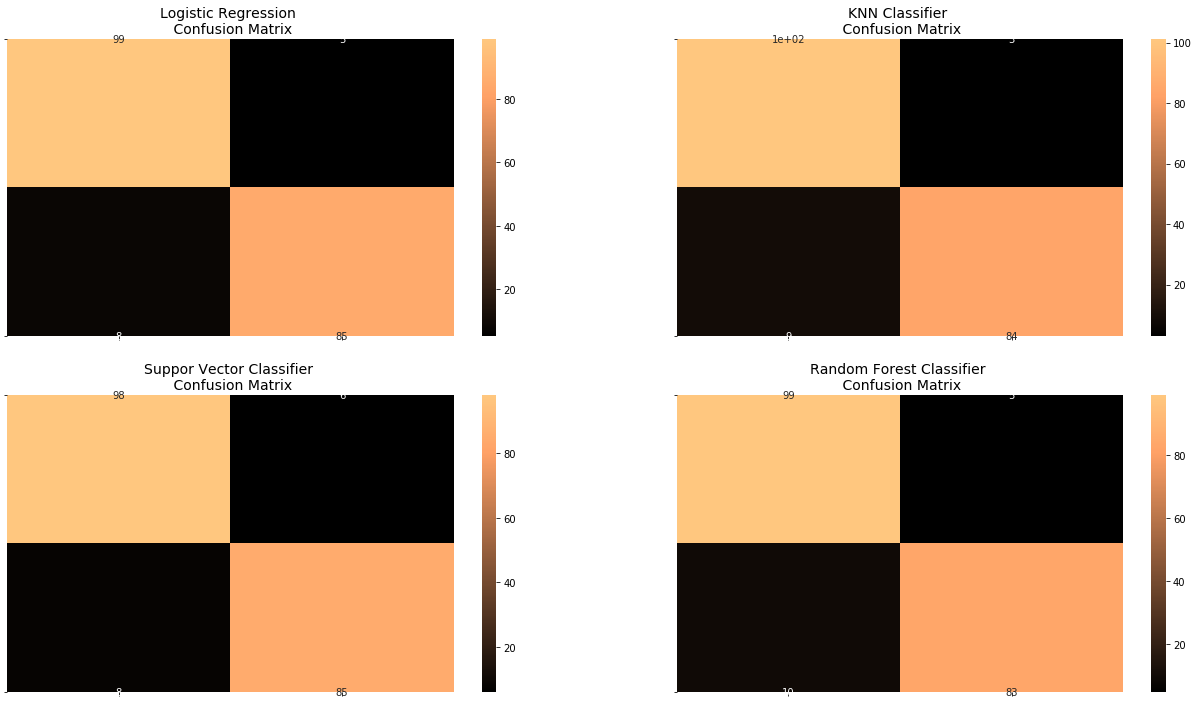

In [19]:
from sklearn.metrics import confusion_matrix

y_pred_logreg = log_reg.predict(X_test) 
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)
y_pred_randf = randf_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_logreg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)
randf_cf = confusion_matrix(y_test, y_pred_randf)

fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNN Classifier \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(randf_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

# Results

In [20]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_logreg))

print('KNN Classifier:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

print('Random Forest Classifier:')
print(classification_report(y_test, y_pred_randf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       104
           1       0.94      0.91      0.93        93

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197

KNN Classifier:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       104
           1       0.97      0.90      0.93        93

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       104
           1       0.93      0.91      0.92        93

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted a